# Lab 4 - part1
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [2]:
from commonfunctions import *
import math
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [9]:
'''
(1) Averaging Filter
'''
def avg_filter(img,filter_size):
    size=int(np.floor(filter_size/2))
    output_img = np.copy(img)
    for i in range(size,img.shape[0]-size):
        for j in range(size,img.shape[1]-size):
            val=0
            for k in range(i-size,i+size+1):
                for s in range (j-size,j+size+1):
                    val+=img[k][s]
            val/=(filter_size*filter_size)
            output_img[i][j]=val
    return output_img


C:\Users\Mazen Amr\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Mazen Amr\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


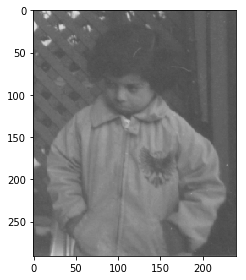

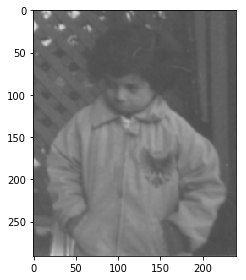

In [27]:
img=io.imread("pout.tif")
io.imshow(img)
io.show()
img_filter=avg_filter(img,3)
io.imshow(img_filter)
io.show()

In [33]:
'''
(2) Median Filter
'''
def Median_filter(img,filter_size1,filter_size2):
    size1=int(np.floor(filter_size1/2))
    size2=int(np.floor(filter_size2/2))
    output_img = np.copy(img)
    for i in range(size1,img.shape[0]-size1):
        for j in range(size2,img.shape[1]-size2):
            l = []
            for k in range(i-size1,i+size1+1):
                for s in range (j-size2,j+size2+1):
                    l.append(img[k][s])
            l.sort()
            output_img[i][j]=l[int(len(l)/2)]
    return output_img


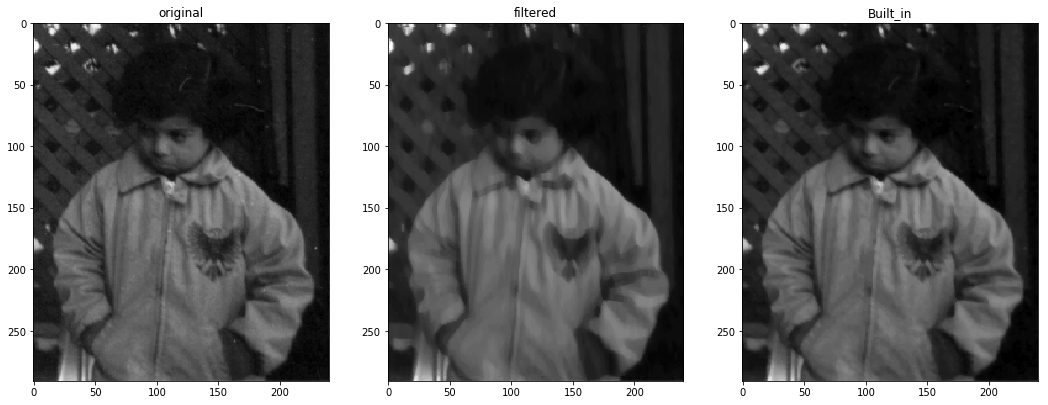

In [38]:
img=io.imread("pout.tif")
img_filter=Median_filter(img,8,3)
Built_in = median(img)
show_images([img,img_filter,Built_in],["original","filtered","Built_in"])